# Neural Networks

* Importing Libraries

In [9]:
import numpy as np
# numpy library for vectorization computations

import random as rd 
# will be useful for getting random number.

from tqdm import tqdm


import matplotlib.pyplot as plt 
# matplotlib is used for visualization things.

import torch  
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F
from torch.autograd import grad 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader 
# torch libraries for accessing neural network module,
# optimizers, functional API's (loss functions), 
# setting up gradient descent (differentiation), importing Dataset

import torchvision 
import torchvision.transforms as transforms 
from torchvision import datasets
# torch vision is used for visualizing tensors/torch variables.
# transforms is used for transforming the data into normalized/standardized conditions.


### **Skip to section (C) For combined modelling.**

![](https://images.indianexpress.com/2022/03/Netflix-Skip-Intro.jpg)

## A) Building Network of Random Number 

**Description:**

Building a Neural Network which intakes 1 input 

* a random number between (0,9)

and go through few/several hidden layers and provides the output as 

* picked random number.


**Coding & Building Networks**

* Let us build a random number network, which takes input a one-hot encoded tensor of a random number between (0-9) & predicts & provides output of the chosen random number

**Sample usage of one-hot encoding**

In [ ]:
num=torch.randint(0,10,(100,))
rep=F.one_hot(torch.tensor(num),num_classes=10)
print('Shape of 100 random numbers between (0-9): ')
print(num.shape)
print("\n")
# print(rep)
print('shape of one-hot encoded representation of 100 random numbers between (0-9): ')
print(rep.shape)

Shape of 100 random numbers between (0-9): 
torch.Size([100])


shape of one-hot encoded representation of 100 random numbers between (0-9): 
torch.Size([100, 10])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


* The RandNumber class is created to store & load the random numbers through torch randint and it is a  custom dataset that we created.
* It takes input of data frame & returns the row with the help of index from __getitem__ function.
* It returns length of row in __len__ method.

**Let us create train_loader & test_loaders to get data from custom dataset in batches**

* train_loaders stores the data of respective batch_size activating the shuffling method & same for test_loaders

In [ ]:
train_loader = DataLoader(RandNumber(),batch_size=125,shuffle=True, num_workers = 1)
test_loader = DataLoader(RandNumber(),batch_size=125,shuffle=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == "__main__":


In [ ]:
count = 0 
for i in train_loader:
    count += 1 
print(f"Number of training batches: {count}")

Number of training batches: 80


In [ ]:
c = 0 
for t in test_loader:
    c += 1
print(f"Number of testing batches: {c}")

Number of testing batches: 80


* Total dataset has : 10000 elements & with batch_size = 125, there will be total_elements/batch_size

* 10000/125 = 80

**Printing Data of train_loader & test_loaders**

In [ ]:
print(next(iter(train_loader))[1])

tensor([5, 0, 5, 8, 3, 8, 5, 1, 2, 5, 2, 2, 1, 1, 6, 0, 5, 6, 2, 3, 3, 8, 1, 5,
        4, 6, 5, 4, 5, 1, 0, 4, 5, 5, 6, 4, 3, 3, 3, 4, 4, 5, 9, 9, 4, 9, 9, 6,
        3, 0, 5, 1, 9, 6, 7, 4, 6, 3, 0, 1, 4, 1, 0, 0, 3, 4, 7, 1, 3, 6, 7, 3,
        9, 3, 0, 5, 5, 9, 9, 6, 9, 3, 0, 4, 6, 0, 7, 3, 5, 5, 6, 3, 1, 1, 4, 4,
        6, 2, 4, 8, 5, 4, 3, 4, 8, 9, 3, 2, 5, 2, 2, 0, 0, 0, 5, 6, 2, 0, 8, 2,
        4, 7, 5, 8, 5])


In [ ]:
print(next(iter(test_loader))[1])

tensor([2, 3, 4, 3, 5, 9, 7, 0, 6, 8, 2, 8, 3, 1, 2, 5, 1, 8, 5, 6, 0, 8, 7, 4,
        5, 7, 7, 9, 4, 7, 0, 6, 6, 4, 3, 4, 9, 1, 0, 9, 2, 6, 3, 5, 5, 4, 7, 4,
        0, 4, 9, 5, 3, 2, 4, 3, 7, 6, 9, 8, 8, 2, 6, 5, 8, 3, 1, 1, 4, 3, 3, 7,
        1, 3, 5, 1, 3, 9, 9, 1, 0, 2, 0, 6, 7, 8, 8, 0, 0, 9, 9, 7, 2, 4, 3, 3,
        9, 6, 8, 2, 5, 9, 6, 7, 0, 6, 7, 1, 2, 3, 7, 4, 2, 2, 9, 5, 4, 7, 7, 9,
        3, 2, 5, 2, 6])


**Dataset is made ready, lets try to build a neural network.**

In [ ]:
## Creating Network for MNISt 
class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(in_features=10,out_features=240)
    self.fc2 = nn.Linear(in_features=240,out_features=720)
    self.fc3 = nn.Linear(in_features=720,out_features=1024)
    self.fc4 = nn.Linear(in_features=1024,out_features=10)
    
  def forward(self,t):
    x = t 
    x = x.reshape(-1,10)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = self.fc4(x) 
        
    return F.log_softmax(x,dim=1)
 
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=10, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=720, bias=True)
  (fc3): Linear(in_features=720, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=10, bias=True)
)


* we have built a four-layered architecture, where it takes input of tensor of length 10 which has one-hot encoded representation of random numbers between [0,9]

**Let's set the configurations of processing**

In [ ]:
# lets some configurations such as GPU, batch_size, 
torch.manual_seed(1)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
print(f"Cuda is available: {use_cuda}")
# Check if cuda is available, returns True
# If cuda is available , it uses gpu else cpu
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}


Cuda is available: True


**Let us try to get summary of model,**

In [ ]:
# !pip install torchsummary


In [ ]:
from torchsummary import summary
summary(model,input_size=(1,10))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 240]           2,640
            Linear-2                  [-1, 720]         173,520
            Linear-3                 [-1, 1024]         738,304
            Linear-4                   [-1, 10]          10,250
Total params: 924,714
Trainable params: 924,714
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.53
Estimated Total Size (MB): 3.54
----------------------------------------------------------------


* Let's train & test the model with the network

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    # starts
    pbar = tqdm(train_loader)
    # Gets the progress bar
    # enumerate through index and data
    for batch_idx,(data, target) in enumerate(pbar):
        data, target = data.to(device).float(), target.to(device)
        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = model(data)
        
        loss = F.nll_loss(output, target)

        # loss_func(output, tar)
        # Calculates the loss function
        loss.backward()
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move to next parameter
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
        # returns the metric

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    # initiate variable
    with torch.no_grad(): # differnation is set to false in this line
        for data, target in test_loader: # iterates through test data
            data, target = data.to(device).float(), target.to(device)
            output = model(data) 
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    # calc. loss

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# recalls the model
optimizer = optim.SGD(model.parameters(), lr=0.01)
# optimzier updates the parameters

# model is iterated for 2 epochs
for epoch in range(5):
    train(model, device, train_loader, optimizer, epoch)
    # through training and testing functions which calc, and updates paramters and finally calc. losses & learns.
    test(model, device, test_loader)

loss=1.7834254503250122 batch_id=79: 100%|██████████| 80/80 [00:00<00:00, 150.15it/s]



Test set: Average loss: 1.7777, Accuracy: 10000/10000 (100%)



loss=1.1860384941101074 batch_id=79: 100%|██████████| 80/80 [00:00<00:00, 138.36it/s]



Test set: Average loss: 1.1803, Accuracy: 10000/10000 (100%)



loss=0.6223138570785522 batch_id=79: 100%|██████████| 80/80 [00:00<00:00, 93.09it/s] 



Test set: Average loss: 0.6133, Accuracy: 10000/10000 (100%)



loss=0.29126468300819397 batch_id=79: 100%|██████████| 80/80 [00:00<00:00, 145.20it/s]



Test set: Average loss: 0.2927, Accuracy: 10000/10000 (100%)



loss=0.16122344136238098 batch_id=79: 100%|██████████| 80/80 [00:00<00:00, 145.91it/s]



Test set: Average loss: 0.1586, Accuracy: 10000/10000 (100%)



In [ ]:
print('Random Number Network is Done!')

Random Number Network is Done!


## B) Building Neural Network of MNIST digit


**Description**

Building a Neural Network which intakes 2 inputs 

* a MNIST digit

and go through few/several hidden layers and provides the output as 

* Predicted MNIST digit.

**Coding & Building Network**

In [ ]:
## Creating Network for MNISt 
class Nets(nn.Module):
  def __init__(self):
    super(Nets,self).__init__()
    # 28x28 
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3)
    self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3)
    self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3)
    self.conv5 = nn.Linear(in_features=256*8*8,out_features=1024)
    self.conv6 = nn.Linear(in_features=1024,out_features=10)
    

  def forward(self,t):
    x = t 
    
    # At input Layer --> 28x28 
    x = self.conv1(x)
    x = F.relu(x)
    # After layer1  --> 26x26
    x = self.conv2(x)
    x = F.relu(x)
    # After layer2 --> 24x24
    x = F.max_pool2d(x,kernel_size=2)
    # After maxPooling --> 12x12 
    
    x = self.conv3(x)
    x = F.relu(x)
    # After layer3 --> 10x10 
    x = self.conv4(x)
    # After layer4 --> 8x8 

    x = x.reshape(-1,256*8*8)
    x = self.conv5(x)
    x = self.conv6(x)
   
    return F.log_softmax(x,dim=1)


mnist = Nets()
mnist_model = Nets().to(device)
print(mnist)

Nets(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Linear(in_features=16384, out_features=1024, bias=True)
  (conv6): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# !pip install torchsummary
from torchsummary import summary
summary(mnist_model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                 [-1, 1024]      16,778,240
            Linear-6                   [-1, 10]          10,250
Total params: 17,176,330
Trainable params: 17,176,330
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.68
Params size (MB): 65.52
Estimated Total Size (MB): 66.20
----------------------------------------------------------------


In [ ]:
## Parameters of Network 

# First Layer : input_channels = 1,out_channels = 32 , filter_size = 3 
### params = ((filter_size*filter_size*input_channels)+1)*out_channels)
# params = ((3*3)+1)*32 = ((9)+1)*32 = 10*32 = 320 

# second Layer : Input_channels = 32, out_channels = 64, filter_size= 3 
## params = ((3*3*32)+1)*64 = 18496 

# Third Layer: Input_channels = 64, out_channels = 128, filter_size =3
## params = ((3*3*64)+1)*128) = 73856 

# Fourth Layer: Input_channels = 128, out_channels = 256, filter_size = 3 
## params = ((3*3*128)+1)*256 = 2,95,168 

# Fifth Layer: Fully Connected Layer, image of 8*8*128 resized to single array of 256*8*8
###  ((current layer neurons c * previous layer neurons p)+1*c).
## 256*8*8 (16384)  ---> 1024 
## params = ((1024*16384)*1)+1024


# Sixth Layer: Fully connected Layer, Input features of 1024 are made to 10 output features
## 1024*10 + 10  = 10250

**Lets set configurations of processing**

In [ ]:
torch.manual_seed(1)
use_cuda = torch.cuda.is_available()
print('Cuda is available: ',use_cuda)
# Check if cuda is available, returns True
device = torch.device("cuda" if use_cuda else "cpu")
# If cuda is available , it uses gpu else cpu
batch_sizer = 128 
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

Cuda is available:  True


**Lets load train& test datasets from pre-prepared MNIST dataset**

In [ ]:
mnist_train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_sizer, shuffle=False, **kwargs)
mnist_test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_sizer, shuffle=False, **kwargs)

In [ ]:
print(len(mnist_test_loader),len(mnist_train_loader))

79 469


In [ ]:
print(next(iter(mnist_train_loader))[0].shape)
print(next(iter(mnist_test_loader))[0].shape)
print(next(iter(mnist_train_loader))[1].shape)
print(next(iter(mnist_test_loader))[1].shape)

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128])


In [ ]:
c = 0
for tr in mnist_train_loader:
  c += 1
print(c)

469


In [ ]:
d = 0 
for ts in mnist_test_loader:
    d+=1 
print(d)

79


* Each batch has 32 images & 32 labels. So there are total of 1875 batches(60000/32)

* Lets train & test the model passing through layers of network architecture

In [ ]:
def mnist_train(mnist_model, device, train_loader, optimizer, epoch):
    mnist_model.train()
    # starts
    pbar = tqdm(train_loader)
    # Gets the progress bar
    # enumerate through index and data
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = mnist_model(data)
        loss = F.nll_loss(output, target)
        # Calculates the loss function
        loss.backward()
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move to next parameter
    pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
    # returns the metric

def mnist_test(mnist_model, device, test_loader):
    mnist_model.eval()
    test_loss = 0
    correct = 0
    # initiate variable
    with torch.no_grad(): # differnation is set to false in this line
        for data, target in test_loader: # iterates through test data
            data, target = data.to(device), target.to(device)
            output = mnist_model(data) 
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    # calc. loss

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
     



mnist_model = Nets().to(device)
# recalls the model
optimizer = optim.SGD(mnist_model.parameters(), lr=0.01)
# optimzier updates the parameters

# model is iterated for 2 epochs
for epoch in range(4):
    mnist_train(mnist_model, device, mnist_train_loader, optimizer, epoch)
    # thrugh training and testing functions which calc, and updates paramters and finally calc. losses & learns.
    mnist_test(mnist_model, device, mnist_test_loader)

loss=0.4230557382106781 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.34it/s] 



Test set: Average loss: 0.3107, Accuracy: 9071/10000 (91%)



loss=0.3523097336292267 batch_id=468: 100%|██████████| 469/469 [00:18<00:00, 25.74it/s]  



Test set: Average loss: 0.1670, Accuracy: 9508/10000 (95%)



loss=0.32872405648231506 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.71it/s] 



Test set: Average loss: 0.1018, Accuracy: 9692/10000 (97%)



loss=0.31793415546417236 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.27it/s] 



Test set: Average loss: 0.0813, Accuracy: 9738/10000 (97%)



In [ ]:
print("MNIST NETWORK IS DONE!")
# https://neptune.ai/blog/pytorch-loss-functions

MNIST NETWORK IS DONE!


## C) Building Neural Network of MNIST & Random Number

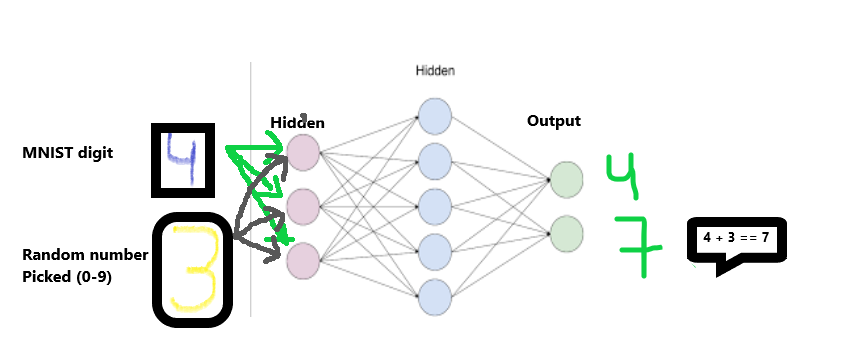

**Description:**

Building a Neural Network which intakes 2 inputs 

* a MNIST digit
* a random number between (0,9)

and go through few/several hidden layers and provides the output as 

* Predicted MNIST digit
* Sum of Predicted MNIST digit and picked random number.


### Key things we are following here:

**1. Configurations**:

- We are setting up GPU with help torch.cuda()

**2.Custom Datasets & the process of usage**

- We are loading train&test datasets of **MNIST dataset** with pre-loaded datasets using torchvision and passing them through CustomDataset class (here customdataset is **NetworkData**), as we are passing we are reading train_data & train_label in the class & returning them as a list. Also, we are generating random number in the class and storing the one-hot encoded value of number which is the input alongside of MNIST digit, this dataset will return inputs (mnist digit, one-hot encoded tensor), outputs(mnist_label,mnist_label+randNumber)

**3. Why the loss function**

- We are using Negative likelihood loss function, as this is a multi-classification labels network & it considers taking the log of the probability value after softmax and add the probability value of the correct answer to the average.

**4. Evaluation of results**

- We are training the network & checking the output of trained model and comparing it with our target value and by that we are trying to make the model learn by backpropogation.

**5. Where & Why & When of combining layers**

- We are combining two layers after 6 layers of MNIST (which has output of 10features) & 4 layers of random number (which has output of 10 features) by creating a one-more fully connected layer with 20 features as input and 19 features as output.

In [72]:
# setting configs
torch.manual_seed(1)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu-")
print(f"{device} is available")
# If cuda or gpu available returns True else False
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

cuda is available


* Loading MNIST datasets

In [13]:
train_loader = torchvision.datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))]))
test_loader = torchvision.datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))]))#, **kwargs)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [11]:
print(next(iter(train_loader))[0].shape)
print(next(iter(test_loader))[0].shape)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


In [24]:
class NetworkData(Dataset):
    
    def __init__(self,mnist_train):
        self.image = mnist_train.train_data
        self.label = mnist_train.train_labels
        
        self.randNum = None 
        self.encodedValue = None 
        self.randNum = torch.randint(0,10,(60000,))
        self.encodedValue = F.one_hot(torch.tensor(self.randNum),num_classes=10).float()
        
        self.output_target = self.randNum + self.label 
        
        binary = self.encodedValue
        target = self.randNum.float()
        self.datas = [(binary[index], target[index]) for index in range(len(target))]
        self.mnist_data=[(self.image[index],self.label[index],self.output_target[index]) for index in range(len(self.label))]
        
    
    def __len__(self): 
        return len(self.datas)

    def __getitem__(self,idx):
        return self.datas[idx],self.mnist_data[idx]
    
nD = NetworkData(train_loader)
print(nD)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


* Accessing Custom dataset we created & loading it in train & test.

In [25]:
from torch.utils.data import DataLoader 

trainLoader = DataLoader(nD,batch_size=128,shuffle=True, num_workers=2, pin_memory=True)
testLoader = DataLoader(nD,batch_size=128,shuffle=True)

* Train data shape: 

In [26]:
print('One-hot encoding: ', next(iter(trainLoader))[0][0].shape)
print('Rand Number: ',next(iter(trainLoader))[0][1].shape)
print('MNIST Image matrix: ',next(iter(trainLoader))[1][0].shape)
print('MNIST Label: ',next(iter(trainLoader))[1][1].shape)
print('Combined output: ',next(iter(trainLoader))[1][2].shape)

One-hot encoding:  torch.Size([128, 10])
Rand Number:  torch.Size([128])
MNIST Image matrix:  torch.Size([128, 28, 28])
MNIST Label:  torch.Size([128])


Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


Combined output:  torch.Size([128])


Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


* Test data shapes:

In [27]:
print('One-hot encoding: ', next(iter(testLoader))[0][0].shape)
print('Rand Number: ',next(iter(testLoader))[0][1].shape)
print('MNIST Image matrix: ',next(iter(testLoader))[1][0].shape)
print('MNIST Label: ',next(iter(testLoader))[1][1].shape)
print('Combined output: ',next(iter(testLoader))[1][2].shape)

One-hot encoding:  torch.Size([128, 10])
Rand Number:  torch.Size([128])
MNIST Image matrix:  torch.Size([128, 28, 28])
MNIST Label:  torch.Size([128])
Combined output:  torch.Size([128])



**Why num_workers**?

* Num_workers tells the data loader instance how many sub-processes to use for data loading. If the num_worker is zero (default) the GPU has to weight for CPU to load data. Theoretically, greater the num_workers, more efficiently the CPU load data and less the GPU has to wait.

In [45]:
## Creating Network for MNISt 
class Networks(nn.Module):

  def __init__(self):
    super(Networks,self).__init__()
    # MNIST 
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3)
    self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3)
    self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3)
    self.conv5 = nn.Linear(in_features=256*8*8,out_features=1024)
    self.conv6 = nn.Linear(in_features=1024,out_features=10)
    
    ## Random Number
    self.fc1 = nn.Linear(in_features=10,out_features=24)
    self.fc2 = nn.Linear(in_features=24,out_features=72)
    self.fc3 = nn.Linear(in_features=72,out_features=36)
    self.fc4 = nn.Linear(in_features=36,out_features=10)
    
    # combinedOutput 
    self.combine = nn.Linear(in_features=20,out_features=19)


  def forward(self,t1,t2):
    # first input MNIST
    x = t1 
    # At input Layer --> 28x28 
    x = self.conv1(x)
    x = F.relu(x)
    # After layer1  --> 26x26
    x = self.conv2(x)
    x = F.relu(x)
    # After layer2 --> 24x24
    x = F.max_pool2d(x,kernel_size=2)
    # After maxPooling --> 12x12 
    
    x = self.conv3(x)
    x = F.relu(x)
    # After layer3 --> 10x10 
    x = self.conv4(x)
    # After layer4 --> 8x8 

    x = x.reshape(-1,256*8*8)
    x = self.conv5(x)
    x = self.conv6(x) 
    
    # second input, random number
    y = t2 
    y = y.reshape(-1,10)
    y = self.fc1(y)
    y = self.fc2(y)
    y = self.fc3(y)
    y = self.fc4(y) 
    
    # combined architecture
    z = torch.cat((x,y),dim=1)
    z = self.combine(z)
    return F.log_softmax(x,dim=1),F.log_softmax(z,dim=1)


combined = Networks().to(device)
print(combined)

Networks(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Linear(in_features=16384, out_features=1024, bias=True)
  (conv6): Linear(in_features=1024, out_features=10, bias=True)
  (fc1): Linear(in_features=10, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=72, bias=True)
  (fc3): Linear(in_features=72, out_features=36, bias=True)
  (fc4): Linear(in_features=36, out_features=10, bias=True)
  (combine): Linear(in_features=20, out_features=19, bias=True)
)


* Let us train with negative likelihood loss function

In [46]:
from tqdm import tqdm
def mnist_train(model, device, trainLoader,optimizer, epoch):
    model.train()
    # starts"
    pbar = tqdm(trainLoader)
    
    for batch_idx, data in enumerate(pbar):
        rand,mnist = data
        encodedValue,label = rand
        mnistDigit,mnistLabel,combinedTarget = mnist 
        mnistDigit = mnistDigit.unsqueeze(1).to(device).float()
        mnistLabel = mnistLabel.to(device)
        combinedTarget = combinedTarget.type(torch.LongTensor)
        combinedTarget = combinedTarget.to(device)
        encodedValue = encodedValue.to(device).float()
        label = label.type(torch.LongTensor)
        label = label.to(device)
        
        # converting targets to long tensor because of nll max kernel cuda error

        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = model(mnistDigit,encodedValue)
        output1 = torch.tensor(output[0])
        output2 = torch.tensor(output[1])        
        loss1 = F.nll_loss(output1, label)
        loss2 = F.nll_loss(output2, combinedTarget)
       
        # Calculates the loss function
        loss1.requires_grad = True 
        loss2.requires_grad = True
        tot_loss = loss1 + loss2 

        tot_loss.backward()
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move to next parameter
    pbar.set_description(desc= f'loss={loss1.item()} batch_id={batch_idx}')
    # returns the metric


combined = Networks().to(device)
# recalls the model
optimizer = optim.SGD(combined.parameters(), lr=0.01)
# optimzier updates the parameters
EPOCHS = 2 
# model is iterated for 2 epochs
for epoch in range(EPOCHS):
    mnist_train(combined, device, trainLoader,optimizer, epoch)

  0%|          | 0/469 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 469/469 [00:04<00:00, 111.10it/s]


* Let us evaluate, 

In [61]:
from tqdm import tqdm
def mnist_test(model, device,testLoader,epoch):
    combined.eval()
    
    test_loss1 = 0 
    correct1 = 0 
    test_loss2 = 0
    correct2 = 0 
    pbars = tqdm(testLoader)
    with torch.no_grad(): # differnation is set to false in this line
        for batch_idx, data in enumerate(pbars):
            rand,mnist = data
            encodedValue,label = rand
            mnistDigit,mnistLabel,combinedTarget = mnist 
            mnistDigit = mnistDigit.unsqueeze(1).to(device).float()
            mnistLabel = mnistLabel.to(device)
            combinedTarget = combinedTarget.type(torch.LongTensor)
            combinedTarget = combinedTarget.to(device)
            encodedValue = encodedValue.to(device).float()
            label = label.type(torch.LongTensor)
            label = label.to(device)
#             target.view(1, -1)
            output = model(mnistDigit,encodedValue)
            output1 = torch.tensor(output[0])
            output2 = torch.tensor(output[1])   
        
            test_loss1 += F.nll_loss(output1, label, reduction='sum').item()   # sum up batch loss
            test_loss2 += F.nll_loss(output2, combinedTarget, reduction='sum').item() 
            tot_loss = test_loss1+test_loss2
            predict1 = output1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            predict2 = output2.argmax(dim=1,keepdim=True)
            
            correct1 += predict1.eq(label.view_as(predict1)).sum().item()
            correct2 += predict2.eq(combinedTarget.view_as(predict2).sum().item())
        
        print("epoch : " , epoch , "total loss : ", tot_loss, " correct1 : ", correct1, "correct2 : ",correct2.shape)

    test_loss1 /= len(testLoader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss1, correct1, len(test_loader.dataset),100. * correct1 / len(test_loader.dataset)))
    
    length = len(testLoader.dataset)
    test_loss2 /= length 
    print('\nCombined OP: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss1, correct2, length,100. * correct2 / length))

# model is iterated for 2 epochs for test
for epoch in range(1):
    # testing functions which calc, and updates paramters and finally calc. losses & learns.
    mnist_test(combined, device,testLoader,epoch)

  0%|          | 0/469 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|█████████▉| 468/469 [00:03<00:00, 154.35it/s]


RuntimeError: The size of tensor a (128) must match the size of tensor b (96) at non-singleton dimension 0

In [71]:

pbar = tqdm(trainLoader)
for epoch in range(300): 
    total_loss =0 
    correct1 = 0 
    correct2 = 0
    tot_correct = 0
    for batch_idx, data in enumerate(pbar):
        rand,mnist = data
        encodedValue,label = rand
        mnistDigit,mnistLabel,combinedTarget = mnist 
        mnistDigit = mnistDigit.unsqueeze(1).to(device).float()
        mnistLabel = mnistLabel.to(device)
        combinedTarget = combinedTarget.type(torch.LongTensor)
        combinedTarget = combinedTarget.to(device)
        encodedValue = encodedValue.to(device).float()
        label = label.type(torch.LongTensor)
        label = label.to(device)

        # converting targets to long tensor because of nll max kernel cuda error

        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = combined(mnistDigit,encodedValue)
        output1 = torch.tensor(output[0])
        output2 = torch.tensor(output[1])        
        loss1 = F.nll_loss(output1, label)
        loss2 = F.nll_loss(output2, combinedTarget)

        # Calculates the loss function
        loss1.requires_grad = True 
        loss2.requires_grad = True
        
        loss1.backward()
        loss2.backward()
        tot_loss = loss1+loss2
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move t
        total_loss += tot_loss.item()
    if epoch % 15 == 0:
      print("epoch", epoch, "loss:", total_loss)

  0%|          | 0/469 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 469/469 [00:04<00:00, 103.89it/s]

epoch 0 loss: 3764.1526532173157


epoch 15 loss: 3764.3100872039795
epoch 30 loss: 3764.1765875816345
epoch 45 loss: 3764.03285074234
epoch 60 loss: 3764.1903777122498
epoch 75 loss: 3764.077751636505
epoch 90 loss: 3764.096091270447
epoch 105 loss: 3764.1592144966125
epoch 120 loss: 3764.1476073265076
epoch 135 loss: 3764.228371143341
epoch 150 loss: 3764.3420395851135
epoch 165 loss: 3764.1188020706177
epoch 180 loss: 3764.186189174652
epoch 195 loss: 3764.2435116767883
epoch 210 loss: 3764.1349654197693
epoch 225 loss: 3764.2512426376343
epoch 240 loss: 3764.0984206199646
epoch 255 loss: 3764.1906995773315
epoch 270 loss: 3764.1153264045715
epoch 285 loss: 3764.179489135742


In [75]:

pbar = tqdm(trainLoader)
for epoch in range(300): 
    total_loss =0 
    correct1 = 0 
    correct2 = 0
    tot_correct = 0
    for batch_idx, data in enumerate(pbar):
        rand,mnist = data
        encodedValue,label = rand
        mnistDigit,mnistLabel,combinedTarget = mnist 
        mnistDigit = mnistDigit.unsqueeze(1).to(device).float()
        mnistLabel = mnistLabel.to(device)
        combinedTarget = combinedTarget.type(torch.LongTensor)
        combinedTarget = combinedTarget.to(device)
        encodedValue = encodedValue.to(device).float()
        label = label.type(torch.LongTensor)
        label = label.to(device)

        # converting targets to long tensor because of nll max kernel cuda error

        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = combined(mnistDigit,encodedValue)
        output1 = torch.tensor(output[0])
        output2 = torch.tensor(output[1])        
        loss1 = F.nll_loss(output1, label)
        loss2 = F.nll_loss(output2, combinedTarget)

        # Calculates the loss function
        loss1.requires_grad = True 
        loss2.requires_grad = True
        
        predict1 = output1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        predict2 = output2.argmax(dim=1,keepdim=True)
        correct1 += predict1.eq(label.view_as(predict1)).sum().item()
    
        correct2 += predict2.eq(combinedTarget.view_as(predict2).sum().item())
        tot_correct = correct1 + correct2
        
        loss1.backward()
        loss2.backward()
        tot_loss = loss1+loss2
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move t
        total_loss += tot_loss.item()
    if epoch % 15 == 0:
      print("epoch", epoch, "loss:", total_loss, "correct: ",tot_correct)
  

  0%|          | 0/469 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|█████████▉| 468/469 [00:04<00:00, 96.28it/s] 


RuntimeError: The size of tensor a (128) must match the size of tensor b (96) at non-singleton dimension 0

In [74]:
print("Done!")

Done!
